In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader.data import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
#creating global variables for each stock
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [8]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,99.766488,96.875774,98.292659,98.378680,1.566257e+08,98.113678
std,23.044460,22.562308,22.931885,22.793580,7.051495e+07,22.936554
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.744217
25%,79.665623,77.701876,78.704374,78.626249,1.072792e+08,78.349566
50%,97.689999,95.872498,96.840000,96.761250,1.375974e+08,96.420753
75%,119.304998,116.152498,118.042498,117.640001,1.875871e+08,117.512497
max,139.850006,135.020004,138.050003,139.070007,4.268848e+08,139.070007


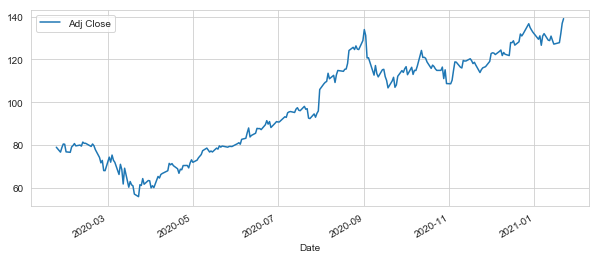

In [9]:
#closing stock price over 1 year 
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

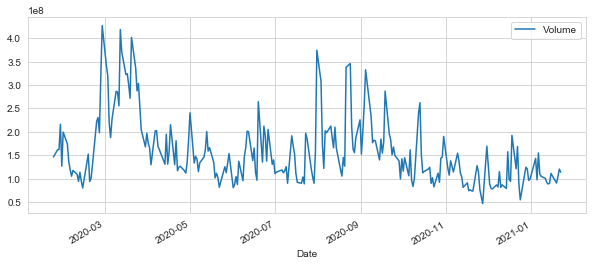

In [10]:
#total volume of stock traded each day over 1 year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
#moving average for the stock
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series(AAPL['Adj Close']).rolling(window=ma).mean()

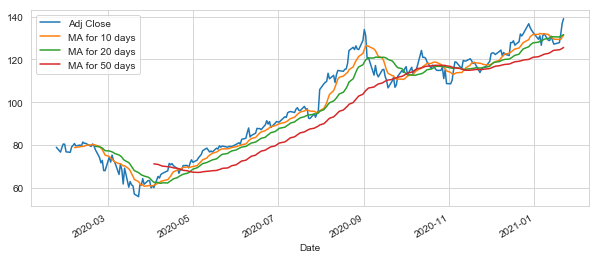

In [12]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False,figsize=(10,4))

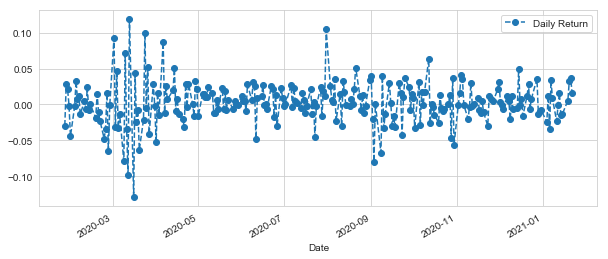

In [13]:
#daily returns
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

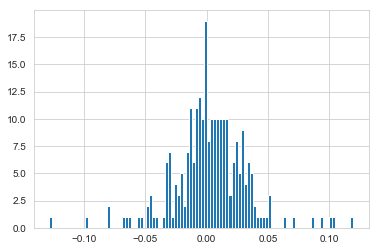

In [14]:
#Graphing Daily Returns using pandas graphing 
AAPL['Daily Return'].hist(bins=100)